# Forward selection

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn  import metrics
import matplotlib.pyplot as plt

# Load already preprocessed dataset
dF = pd.read_csv("prep_sales_data.csv")
dF.head(5)

,flag,gender,education,house_val,age,online,customer_psy,marriage,child,occupation,mortgage,house_owner,region,car_prob,fam_income
0,1,1,0.75,0.024869,6upto65,1,B,1,N,Professional,2Med,1,West,0.1,0.545455
1,0,1,0.75,0.041693,5upto55,1,C,1,Y,Professional,1Low,1,South,0.2,0.727273
2,1,1,0.75,0.024569,4upto45,0,F,1,U,Blue Collar,1Low,1,South,0.3,0.363636
3,1,1,0.50,0.036059,5upto55,1,C,1,Y,Professional,3High,1,Midwest,0.1,0.818182
4,1,0,0.00,0.016288,1_Unk,1,G,1,Y,Professional,1Low,0,South,0.7,0.181818


In [2]:
# Split in train and test sets
X, X_test, y, y_test =  train_test_split(dF.drop(columns = 'flag', axis = 1), dF.flag, test_size=0.30, random_state=1)

In [32]:
# Initialization of the variables used in the forward-selection process

remaining_features = list(X.columns.values)
current_features = []
AUC_list = [np.inf]
Score_list = [np.inf]
features_list = dict()

# Forward-selection over all 14 atributes
# Instantiate a model of logistic regression
from sklearn.linear_model import LogisticRegressionCV
logreg = LogisticRegressionCV(cv = 5, random_state = 1, max_iter = 300, fit_intercept = True)

import itertools
for i in range(1,15):
    print(i)
    best_AUC = 0
    # Pick best among remaining variables
    for comb in itertools.combinations(remaining_features, 1):
        print(comb[0])
        X_ohe = pd.get_dummies(X[list(comb) + current_features])
        logreg.fit(X_ohe, y)
        y_current_pred = logreg.predict(X_ohe)
        AUC = metrics.roc_auc_score(y, y_current_pred)
        print(AUC)
        
        if best_AUC < AUC:
            best_AUC = AUC
            best_score = logreg.score(X_ohe, y)
            best_feature = comb[0]

    # Make best_feature part of current_features, remove it from remaining_features variables for next loop
    current_features.append(best_feature)
    remaining_features.remove(best_feature)
    
    # Keep all found values of AUC and Score
    print(best_AUC)
    AUC_list.append(best_AUC)
    Score_list.append(best_score)
    features_list[i] = current_features.copy()

1
gender
0.6012752998222033
education
0.6032661585912891
house_val
0.5937622337245887
age
0.5920355694343029
online
0.6099994296925448
customer_psy
0.6269821932141688
marriage
0.5365083726651576
child
0.5
occupation
0.6145285914137484
mortgage
0.6071377276312343
house_owner
0.5630469644291265
region
0.5
car_prob
0.6037326293104688
fam_income
0.5930288699108905
0.6269821932141688
2
gender
0.6308694292175885
education
0.6357716745618167
house_val


KeyboardInterrupt: 

In [4]:
print('Selección de mejor subconjunto por forward-selection')
print('Número de atributos |', 'Atributos |', 'Score |', 'AUC')
for i in range(1,15):
        print("#Vars", i, "| Vars", features_list[i], "| Score", Score_list[i], "| AUC", AUC_list[i])

Selección de mejor subconjunto por forward-selection
Número de atributos | Atributos | Score | AUC
#Vars 1 | Vars ['customer_psy'] | Score 0.6433596118859916 | AUC 0.6269821932141688
#Vars 2 | Vars ['customer_psy', 'age'] | Score 0.656701030927835 | AUC 0.640630337262198
#Vars 3 | Vars ['customer_psy', 'age', 'education'] | Score 0.6687689508793208 | AUC 0.651751227690244
#Vars 4 | Vars ['customer_psy', 'age', 'education', 'online'] | Score 0.6765918738629473 | AUC 0.6593596148919451
#Vars 5 | Vars ['customer_psy', 'age', 'education', 'online', 'gender'] | Score 0.6873862947240752 | AUC 0.6712427743064917
#Vars 6 | Vars ['customer_psy', 'age', 'education', 'online', 'gender', 'car_prob'] | Score 0.6908429351121892 | AUC 0.6753676534085076
#Vars 7 | Vars ['customer_psy', 'age', 'education', 'online', 'gender', 'car_prob', 'mortgage'] | Score 0.6930260764099454 | AUC 0.6786778654021632
#Vars 8 | Vars ['customer_psy', 'age', 'education', 'online', 'gender', 'car_prob', 'mortgage', 'occupa

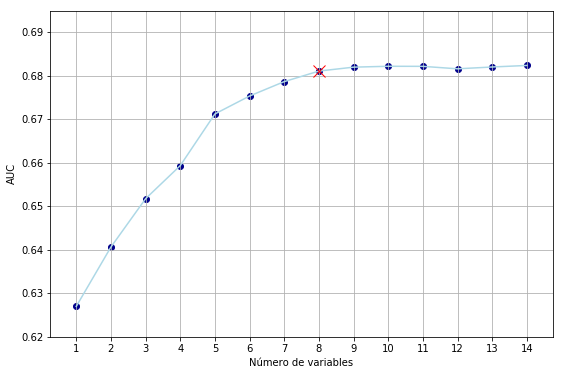

In [22]:
plt.figure(figsize=(9,6))
plt.plot(range(1,15), AUC_list[1:], color = 'lightblue')
plt.scatter(range(1,15), AUC_list[1:], color = 'darkblue')
plt.plot(8, AUC_list[8], 'rx', markersize=12)
plt.xticks(np.arange(1, 15, step=1))
plt.ylim(0.62, 0.695)
plt.xlabel('Número de variables')
plt.ylabel('AUC')
plt.grid(True)
#plt.show()
plt.savefig('AUC.png')

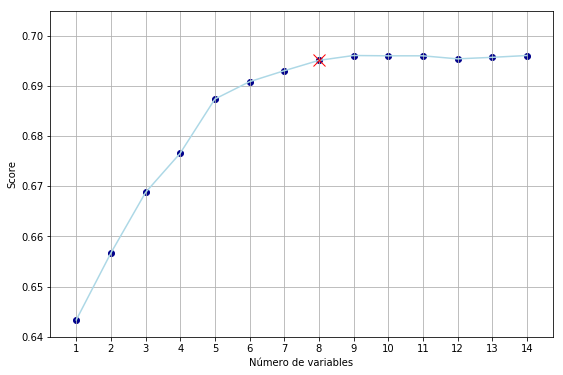

In [21]:
plt.figure(figsize=(9,6))
plt.plot(range(1,15), Score_list[1:], color = 'lightblue')
plt.scatter(range(1,15), Score_list[1:], color = 'darkblue')
plt.plot(8, Score_list[8], 'rx', markersize=12)
plt.xticks(np.arange(1, 15, step=1))
plt.ylim(0.64, 0.705)
plt.xlabel('Número de variables')
plt.ylabel('Score')
plt.grid(True)
plt.savefig('Score.png')

In [28]:
# Best model
from sklearn.linear_model import LogisticRegressionCV
best_logreg = LogisticRegressionCV(cv = 5, random_state = 1, max_iter = 300, fit_intercept = True)

X_ohe = pd.get_dummies(X[features_list[8]])
best_logreg.fit(X_ohe, y)
X_test_ohe = pd.get_dummies(X_test[features_list[8]])

In [30]:
# Details of the best model
print("Coeficientes del modelo: \n", best_logreg.coef_)
print("Score sobre el conjunto de datos completo:", best_logreg.score(X_test_ohe,y_test))

# Quality of the model
y_test_pred = best_logreg.predict(X_test_ohe)
AUC = metrics.roc_auc_score(y_test, y_test_pred)
print("AUC =", AUC)
print("Cualidades de la clasificación:\n", classification_report(y_test, y_test_pred))
print("Matriz de confusión:\n", confusion_matrix(y_test, y_test_pred,labels = range(2)) )

Coeficientes del modelo: 
 [[ 0.69404953  0.66675282 -0.79283815 -0.81503893  0.24885491  0.16876908
   0.29278323 -0.21089085  0.1800335  -0.04492334 -0.07310106 -0.2069472
  -0.25015419 -0.12699086  0.04194937 -0.63460394  0.13708964  0.32387649
   0.36584774  0.10484114 -0.36156723 -0.28854265  0.07167199  0.19430388
  -0.12462604 -0.31243991  0.03590398  0.36961563 -0.05907764  0.0680572 ]]
Score sobre el conjunto de datos completo: 0.7062818336162988
AUC = 0.6936261871587547
Cualidades de la clasificación:
               precision    recall  f1-score   support

           0       0.70      0.59      0.64      3105
           1       0.71      0.80      0.75      3963

   micro avg       0.71      0.71      0.71      7068
   macro avg       0.70      0.69      0.70      7068
weighted avg       0.71      0.71      0.70      7068

Matriz de confusión:
 [[1830 1275]
 [ 801 3162]]


In [44]:
print(len(y))
print((y[0:] == 0).sum())
print((y[0:] == 1).sum())

16490
7114
9376
